In [ ]:
from tensorflow import keras

In [ ]:
(train_X,train_y),(test_X,test_y)=keras.datasets.fashion_mnist.load_data()


Training set 60,000 image 

Test set 10,000 image 

In [ ]:
train_X.shape,train_y.shape

((60000, 28, 28), (60000,))

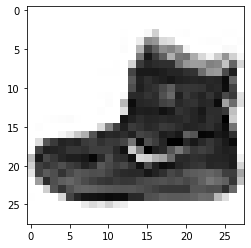

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(train_X[0],cmap='Greys')

In [ ]:
class_labels=['T-shirt','Trouser','pullover','Dress','coat','sandal','shirt','Sneakers','bag','Ankle boot']

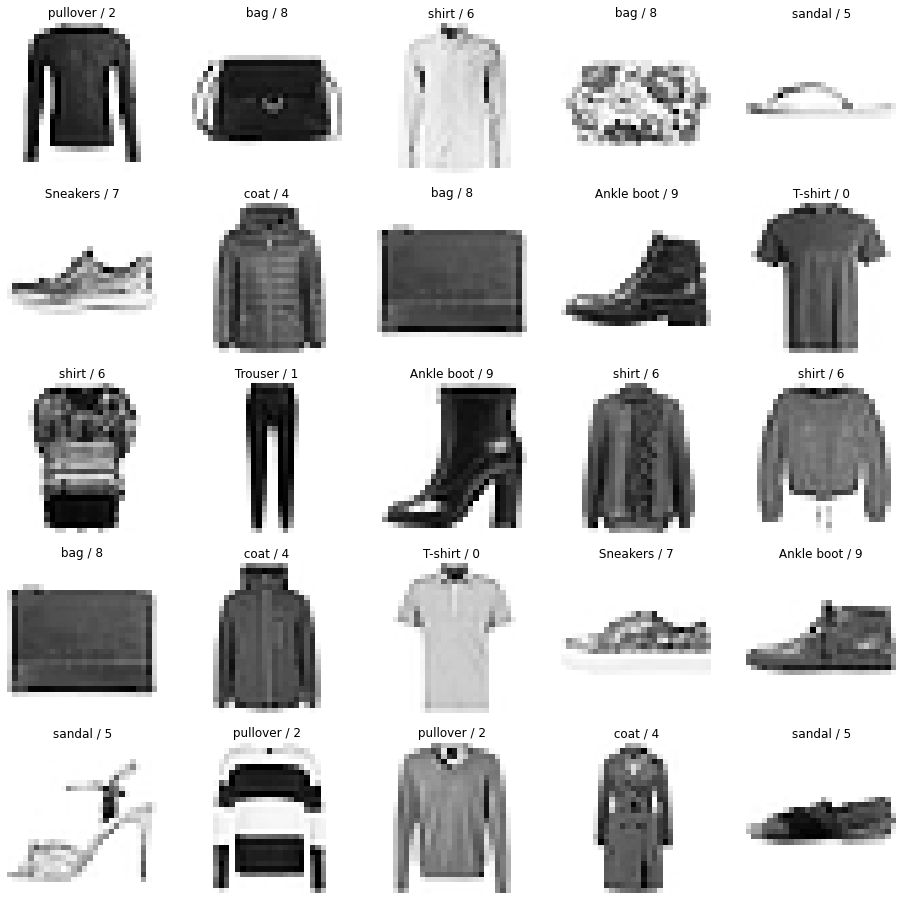

In [ ]:
import numpy as np 
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1500,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(train_X[i],cmap='Greys')
  plt.axis('off')
  plt.title(' {} / {} '.format(class_labels[train_y[i]],train_y[i]))

In [ ]:
num_rows,num_cols=28,28

train_y

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y=keras.utils.to_categorical(np.array(train_y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_y=keras.utils.to_categorical(np.array(test_y))

In [ ]:
train_X.shape

(60000, 28, 28)

In [ ]:
train_X=train_X.reshape(train_X.shape[0],28,28,1)
test_X=test_X.reshape(test_X.shape[0],28,28,1)

In [ ]:
train_X.shape

(60000, 28, 28, 1)

In [ ]:
train_X[0].shape

(28, 28, 1)

Scaling Features

In [ ]:
train_X=(train_X/255).astype('float32')
test_X=(test_X/255).astype('float32')

# Build Model

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout


num_class=10

model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_class,activation='softmax'))







In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_X,y,batch_size=64,epochs=8,validation_split=0.2)

Epoch 1/8
750/750 [==============================] - 28s 35ms/step - loss: 0.7138 - accuracy: 0.7495 - val_loss: 0.3279 - val_accuracy: 0.8818
Epoch 2/8
750/750 [==============================] - 26s 34ms/step - loss: 0.3473 - accuracy: 0.8783 - val_loss: 0.2825 - val_accuracy: 0.8990
Epoch 3/8
750/750 [==============================] - 26s 35ms/step - loss: 0.2892 - accuracy: 0.8973 - val_loss: 0.2694 - val_accuracy: 0.9047
Epoch 4/8
750/750 [==============================] - 26s 35ms/step - loss: 0.2666 - accuracy: 0.9050 - val_loss: 0.2580 - val_accuracy: 0.9067
Epoch 5/8
750/750 [==============================] - 26s 34ms/step - loss: 0.2403 - accuracy: 0.9114 - val_loss: 0.2414 - val_accuracy: 0.9148
Epoch 6/8
750/750 [==============================] - 26s 34ms/step - loss: 0.2245 - accuracy: 0.9178 - val_loss: 0.2386 - val_accuracy: 0.9134
Epoch 7/8
750/750 [==============================] - 26s 34ms/step - loss: 0.2069 - accuracy: 0.9239 - val_loss: 0.2338 - val_accuracy: 0.9158

In [ ]:
model.evaluate(test_X,test_y)

313/313 [==============================] - 2s 7ms/step - loss: 0.2717 - accuracy: 0.9012


[0.2717340886592865, 0.901199996471405]

Text(0.5, 0, 'epochs')

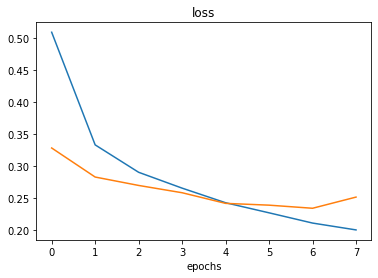

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

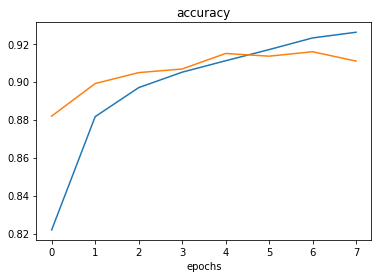

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('accuracy')
plt.xlabel('epochs')